<a href="https://colab.research.google.com/github/Loganche/stepik-intro-to-DS-and-ML/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages & modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

# Model

In [ ]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
y = titanic_data.Survived

In [ ]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(143.54643415178572, 212.004, 'X[6] <= 0.5\nentropy = 0.961\nsamples = 891\nvalue = [549, 342]'),
 Text(52.387232142857144, 201.132, 'X[0] <= 2.5\nentropy = 0.824\nsamples = 314\nvalue = [81, 233]'),
 Text(20.327142857142857, 190.26, 'X[4] <= 28.856\nentropy = 0.299\nsamples = 170\nvalue = [9, 161]'),
 Text(15.544285714285714, 179.388, 'X[4] <= 28.231\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(13.152857142857144, 168.516, 'X[1] <= 23.5\nentropy = 0.426\nsamples = 69\nvalue = [6, 63]'),
 Text(10.76142857142857, 157.644, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(15.544285714285714, 157.644, 'X[1] <= 27.5\nentropy = 0.503\nsamples = 54\nvalue = [6, 48]'),
 Text(9.565714285714286, 146.772, 'X[1] <= 25.5\nentropy = 0.845\nsamples = 11\nvalue = [3, 8]'),
 Text(4.782857142857143, 135.9, 'X[4] <= 13.75\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(2.3914285714285715, 125.02799999999999, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(7.174285714285

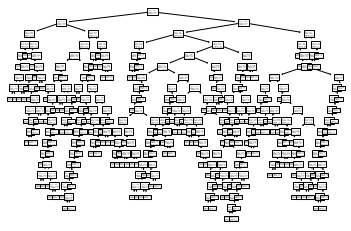

In [ ]:
tree.plot_tree(clf.fit(X, y), )

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(596, 10)

In [ ]:
X_test.shape

(295, 10)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(X_test, y_test)

0.7627118644067796

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [ ]:
clf.score(X_test, y_test)

0.8203389830508474

# Cross-validation (manual)

In [ ]:
max_depth_values = range(1, 100)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [mean_cross_val_score]
        })
    
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.795350


In [ ]:
scores_data_long = pd.melt(
    scores_data,
    id_vars=['max_depth'],
    value_vars=['train_score', 'test_score', 'cross_val_score'],
    var_name='set_type',
    value_name='score')

In [ ]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


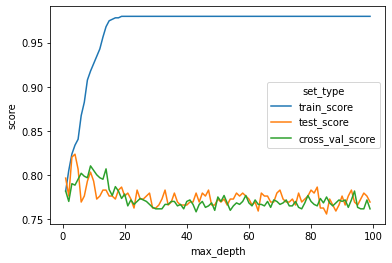

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [ ]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.802073
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.797003
206,9,cross_val_score,0.810434
207,10,cross_val_score,0.805392


In [ ]:
# best depth = 14
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14)

In [ ]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

0.8

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 30)
}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

0.7694915254237288

# Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)

0.75

In [ ]:
recall_score(y_test, y_pred)

0.65

In [ ]:
y_predicted_prob = best_clf.predict_proba(X_test)

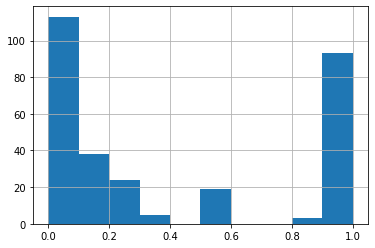

In [ ]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [ ]:
# сделаем причисление к выжившим с шансом не ниже 0.8
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [ ]:
precision_score(y_test, y_pred)

0.7916666666666666

In [ ]:
recall_score(y_test, y_pred)

0.6333333333333333

In [ ]:
# сделаем причисление к выжившим с шансом не ниже 0.2
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)

In [ ]:
precision_score(y_test, y_pred)

0.6805555555555556

In [ ]:
recall_score(y_test, y_pred)

0.8166666666666667

In [ ]:
# Палка о двух концах: нужно выставлять ограничения для классификатора
# в зависимости от того, что требуется максимизировать

# ROC-AUC кривая

In [ ]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.57142857, 0.5       , 0.13793103, 1.        , 0.        ,
       0.85714286, 0.08333333, 0.27272727, 0.28571429, 0.03488372,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

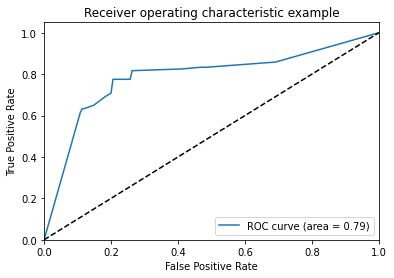

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")